&nbsp;
<div style="text-align: center;">

## <span style="color: black;">Website SuperClassics - Europe Classic Cars</span>

&nbsp;

![SuperClassics Logo](superclassics_logo.png)

&nbsp;

### <span style="color: black;">Descriptive analysis</span>

#### <span style="color: #003E99;">Variables: Brand, Model, Submodel, Year, Origin</span>

#### <span style="color: #003E99;">2272 Cars</span>
    
</div>


## Index

- [<font color='black'> 1. Packages installation</font>](#1)


- [<font color='black'> 2. Data importation</font>](#2)


- [<font color='black'> 3. Descriptive Analysis</font>](#3)
  - [<font color='black'> 3.1. Manufacturing by country - Top 10</font>](#3.1)
  - [<font color='black'> 3.2. Manufacturing by continent</font>](#3.2)
  - [<font color='black'> 3.3. Manufacturing by brand - Top 10</font>](#3.3)


## 1. Packages installation
<a id='1'>

In [24]:
#dataframes
import pandas as pd

#arrays
import numpy as np

#graphics
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

## 2. Data importation
<a id='2'>

In [25]:
db_clean = pd.read_csv('Manufacturers_processeddata.csv')

In [26]:
db_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       2267 non-null   object 
 1   Model       2266 non-null   object 
 2   Submodel    2000 non-null   object 
 3   Origin      2258 non-null   object 
 4   Start_Year  2267 non-null   int64  
 5   End_Year    2137 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 106.4+ KB


In [27]:
db_clean.describe(include='all')

,Brand,Model,Submodel,Origin,Start_Year,End_Year
count,2267,2266,2000,2258,2267.000000,2137.000000
unique,85,479,1338,12,NaN,NaN
top,Citroen,CX,GT,ITALY,NaN,NaN
freq,336,97,23,781,NaN,NaN
mean,NaN,NaN,NaN,NaN,1978.460962,1980.928404
std,NaN,NaN,NaN,NaN,14.468661,14.126900
min,NaN,NaN,NaN,NaN,1928.000000,1931.000000
25%,NaN,NaN,NaN,NaN,1969.000000,1972.000000
50%,NaN,NaN,NaN,NaN,1979.000000,1982.000000
75%,NaN,NaN,NaN,NaN,1991.000000,1993.000000


In [28]:
db_clean = db_clean.dropna(subset=['Start_Year', 'End_Year'])
db_clean['Start_Year'] = db_clean['Start_Year'].astype(int)
db_clean['End_Year'] = db_clean['End_Year'].astype(int)

In [29]:
#SUBMODELS
import pandas as pd

# Suponha que 'df' seja o seu DataFrame com as colunas 'Start_Year' e 'End_Year'

# Crie uma lista de todos os anos de produção para cada registro
all_years = []
for start_year, end_year in zip(db_clean['Start_Year'], db_clean['End_Year']):
    all_years.extend(range(start_year, end_year + 1))

# Crie um novo DataFrame com uma coluna para os anos de produção
years_df = pd.DataFrame({'Year': all_years})


# Contagem da frequência de produções para cada ano
year_counts = years_df['Year'].value_counts()
print(year_counts)

Year
1974    257
1975    245
1994    238
1973    230
1972    217
       ... 
1944      3
1928      2
1929      2
2018      2
2010      1
Name: count, Length: 86, dtype: int64


In [30]:
#MODELS
import pandas as pd

# Suponha que 'db_clean' seja o seu DataFrame com as colunas 'Start_Year', 'End_Year' e 'Model'

# Crie uma lista de todos os anos de produção para cada registro agrupados por 'Model'
all_years = []
for model_group in db_clean.groupby('Model'):
    model_years = []
    start_years = model_group[1]['Start_Year']
    end_years = model_group[1]['End_Year']
    for start_year, end_year in zip(start_years, end_years):
        model_years.extend(range(start_year, end_year + 1))
    all_years.extend(model_years)

# Crie um novo DataFrame com uma coluna para os anos de produção
years_df = pd.DataFrame({'Year': all_years})

# Contagem da frequência de produções para cada ano
year_counts = years_df['Year'].value_counts()
print(year_counts)


Year
1974    257
1975    245
1994    238
1973    230
1972    217
       ... 
1944      3
2018      2
1928      2
1929      2
2010      1
Name: count, Length: 86, dtype: int64


## 3. Descriptive Analysis
<a id='3'>

### 3.1. Manufacturing by country - Top 10
<a id='3.1'>

In [31]:
#value counts all countries
top_pais = db_clean['Origin'].value_counts()
print(top_pais)

Origin
ITALY             738
GERMANY           511
FRANCE            356
UNITED KINGDOM    264
JAPAN             112
UNITED STATES      91
NETHERLANDS        30
SWEDEN             14
SPAIN               9
IRELAND             2
GREECE              1
AUSTRALIA           1
Name: count, dtype: int64


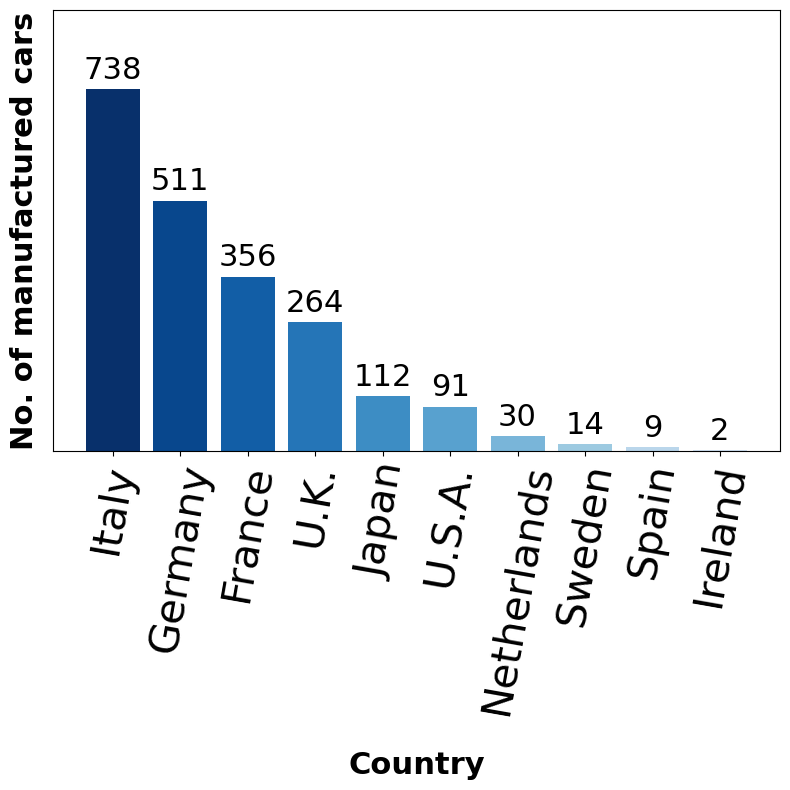

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Data
countries = [
    'Italy', 
    'Germany', 
    'France', 
    'U.K.', 
    'Japan', 
    'U.S.A.', 
    'Netherlands', 
    'Sweden', 
    'Spain', 
    'Ireland'
]
quantity = [738, 511, 356, 264, 112, 91, 30, 14, 9, 2]
colors = plt.cm.Blues_r(np.linspace(0, 0.8, len(countries)))

# Graphic
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(countries, quantity, color=colors)

# Add numeric values above each bar
for bar, val in zip(bars, quantity):
    height = bar.get_height()
    ax.annotate('{}'.format(val),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=22)

# Font size of ticks
plt.xticks(rotation=80, fontsize=30)  
plt.yticks(np.arange(0, max(quantity) + 50, 250), fontsize=24)

# Legend position
plt.ylabel('No. of manufactured cars', fontsize=22, weight='bold', labelpad=10)  # Reduced labelpad
plt.xlabel('Country', fontsize=22, weight='bold', labelpad=24)
plt.ylim(0, 900)

# Automatic size for save (with legends)
#plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='both', left=False, labelleft=False)
plt.tight_layout()

# Save
plt.savefig('DescriptiveAnalysis_Manufacture_Top10_Country.png', dpi=300)
plt.savefig('DescriptiveAnalysis_Manufacture_Top10_Country.eps', dpi=300)
plt.show()


<span style='color:blue'> 
    
- country with the most classic cars manufactured is **Italy**, **Germany** in second ant **France** in third position. Classic car manufactures is mainly in **Europe**.

    

### 3.2. Manufacturing by continent
<a id='3.2'>

In [33]:
#data copy

db_analysis = pd.DataFrame(db_clean)

# dictionary to map continents
country_to_continent = {
    'ITALY': 'Europe',
    'GERMANY': 'Europe',
    'FRANCE': 'Europe',
    'UNITED KINGDOM': 'Europe',
    'JAPAN': 'Asia',
    'UNITED STATES': 'North America',
    'GERMANY / UNITED KINGDOM UP TO 1976': 'Europe',
    'NETHERLANDS': 'Europe',
    'SWEDEN': 'Europe',
    'GERMANY / UNITED KINGDOM': 'Europe',
    'SPAIN': 'Europe',
    'IRELAND': 'Europe',
    'GREECE': 'Europe',
    'AUSTRALIA': 'Oceania',
}

# New column 'Continent' 
db_analysis['Continent'] = db_analysis['Origin'].map(country_to_continent)

# Count entries to each continent
contagem_por_continente = db_analysis['Continent'].value_counts()

print(contagem_por_continente)

Continent
Europe           1925
Asia              112
North America      91
Oceania             1
Name: count, dtype: int64


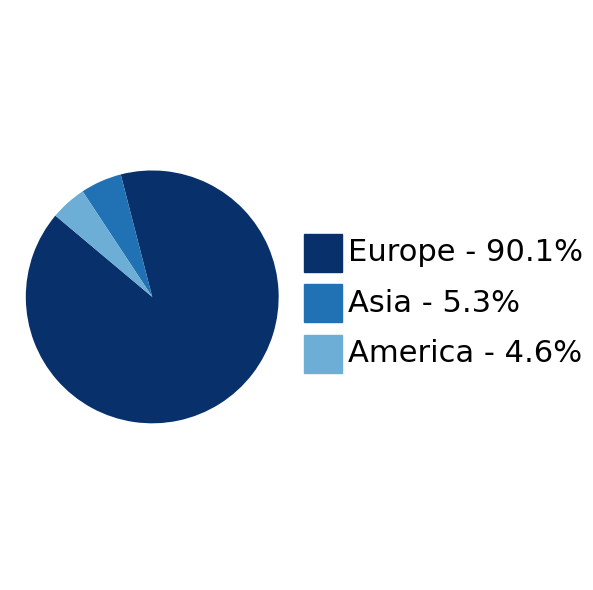

In [34]:
# Data
continents = ['Europe', 'Asia', 'America']
quantity = [2034, 119, 104]
colors = plt.cm.Blues_r(np.linspace(0, 0.5, len(continents)))

# compute percentages
total = sum(quantity)
percent = [(q / total) * 100 for q in quantity]

# graph
plt.figure(figsize=(6, 6))
pie, texts, autotexts = plt.pie(quantity, labels=None, autopct='', colors=colors, startangle=140)

# percentages size
for autotext in autotexts:
    autotext.set_fontsize(20)  # Define o tamanho da fonte das porcentagens

# title
#plt.title('Distribution of Classic Car Manufacturing by Continent', fontsize=14)

# legend
legend_labels = ['Europe', 'Asia', 'America']

legend_x = 1.2
legend_y = 0.2
rect_width = 0.3  # rectangle width 
rect_height = 0.3  # rectangle height 

for i, label in enumerate(legend_labels):
    # rectangle
    rect = Rectangle((legend_x, legend_y - i * 0.4), rect_width, rect_height, color=colors[i])
    plt.gca().add_patch(rect) 
    # rectangle name
    plt.text(legend_x + rect_width + 0.05, legend_y - i * 0.4 + rect_height / 2, f'{label} - {percent[i]:.1f}%', fontsize=22, va='center')

# axis
plt.axis('equal')

# graph limit
plt.ylim(bottom=0.01, top=0.02)

# automatic size for save (with legends)
plt.tight_layout()

# save
plt.savefig('DescriptiveAnalysis_Manufacture_Continent_pie.eps', bbox_inches='tight')
plt.savefig('DescriptiveAnalysis_Manufacture_Continent_pie.png', bbox_inches='tight')

# show
plt.show()



<span style='color:blue'> 
    
- **Europe** is the continent with the most classic car manufacture. **America** in second place. **Asia** as the continent with the lowest manufacturing.
   

### 3.3. Manufacturing by brand - Top 10
<a id='3.3'>

In [35]:
top_brand = db_clean['Brand'].value_counts()
print(top_brand)

Brand
Citroen               305
Lancia                251
Alfa Romeo            186
Ford                  160
BMW                   145
                     ... 
Armstrong Siddeley      1
Ascort                  1
Fuldamobil              1
Bizzarini               1
Zundapp                 1
Name: count, Length: 85, dtype: int64


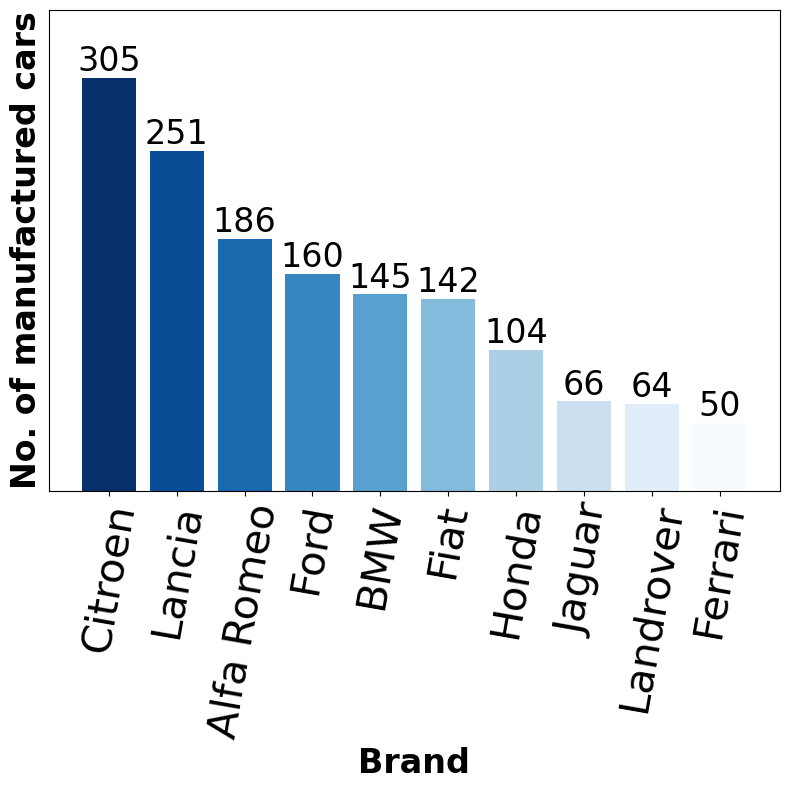

In [36]:
# Data
top_brand = db_clean['Brand'].value_counts().head(10)

# graph
plt.figure(figsize=(8, 8))
bars = plt.bar(top_brand.index, top_brand.values, color=plt.cm.Blues_r(np.linspace(0, 1, len(top_brand))))

# legend
plt.xlabel('Brand', fontsize=24,weight='bold')  # Ajustar o tamanho da legenda do eixo x
plt.ylabel('No. of manufactured cars', fontsize=24,weight='bold')  # Ajustar o tamanho da legenda do eixo y
plt.xticks(rotation=80, fontsize=30)  # Ajustar o tamanho das etiquetas do eixo x e remova a rotação

# legend
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(bar.get_height()), ha='center', fontsize=24)

# legend size
#plt.legend(['Quantity'], fontsize=18)
plt.ylim(0, max(top_brand.values) + 50)
         
# axis size
#plt.tick_params(axis='both', which='major', labelsize=24)

# remove ticks and number y axis
plt.tick_params(axis='both', which='both', left=False, labelleft=False)


# automatic size saving (with legends)
plt.tight_layout()

# Save
plt.savefig('DescriptiveAnalysis_Manufacture_Top10_Brands.eps', dpi=300)
plt.savefig('DescriptiveAnalysis_Manufacture_Top10_Brands.png', dpi=300)
# show
plt.show()

<span style='color:blue'> 
    
- **Citroen** is the classic car most manufactured, **Lancia** in second place, **Alfa Romeo** in third. There some brands, such as fuldamobil, zundapp with only one classic car manufacture (which means that there is only one model for these brands).    
    
